# Fresnel diffraction in python using angular spectrum of plane waves
### Adrián Carbajal-Domínguez, ***adrian.carbajal@ujat.mx***



## Introduction

Scalar near field diffraction integrals (or Fresnel diffraction integrals) are difficult to perform for arbitrary plane boundary conditions. The theoretical details are explained in A Carbajal-Domínguez, JB Arroyo, JE Gomez Correa, GM Niconoff, ***"Numerical calculation of near field scalar diffraction using angular spectrum of plane waves theory and FFT"***,Revista mexicana de física E 56 (2), 159-164.

Here I show python (jupyter notebook) code example to calculate the Fresnel for a plane baoundary condition which in this case is a squared binary image representing an amplitude distribution.
I propose to use the python packages opencv, numpy and matplotlib, so make sure you have them installed.

### Logical steps

1. Draw an image suared image. Here I use a $400 \times 400$ pixels image.
2. Take the 2D Fast Fourier Transform of the image and correct the shift in high and low frequencies.
3. Define the observation distance $z$.
4. Construct the propagation matrix $P_{u,v}$ (see reference).
5. Multiply the corrected Fourier transfor by the propagation matrix.
6. Calculate the squared modulus of this product.
7. Apply a log function to attenuate the intensity and show the result.

These steps are shown and explained in the following code.

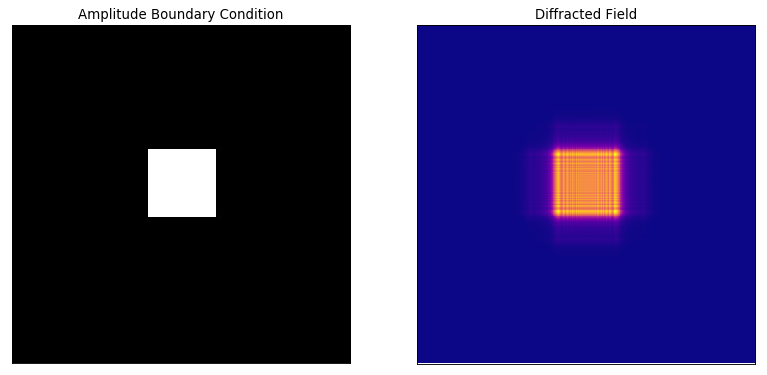

In [3]:
#A very small (and tropical) program in python to calculate the Fresnel Diffraction using the angular spectrum of plane waves
#####################################
#Programa para calcular la difracción de Fresnel mediante el espectro angular de ondas planas.
########################################
# Adrián Carbajal-Dominguez copyright 2018
#adrian.carbajal@ujat.mx
#
###########################################
##As start, lets import the necessary packages. Make sure you got them installed.

####Opencv is used to read the file image.
import cv2
#####Numpy  allows us to make the mathematical calculations.
import numpy as np
########## Matplotlib permits to show the results as an image.
from matplotlib import pyplot as plt

###Read the image. Make sure it is a squared one (same number of rows and cols).
img=cv2.imread('cuadrito.jpg',0)
#Detect the image size just for precaution (Optional).
#print (img.shape)
####Define the size of the propagation function p(u,v). It has to be of the same size of the image.
n1=200
n2=200
###Define the distance of observation z
Z=40
#Define a scale factor for the coordinates
h=10
##Define the wavelenght. 
l_ambda=0.01
##Define the angular spectrum coordinates
u = np.arange(-n1, n1, 1)
v = np.arange(-n2, n2, 1)
U,V = np.meshgrid(u,v)

#Define the propagation matrix
propagator=np.exp(2*np.pi*1j*(Z/h)*np.sqrt((1/l_ambda)**2-(U/10)**2-(V/10)**2))
#### Compute the Fast Fourier Transform of the image
f=np.fft.fft2(img)
##Correct the low and high frequencies
fshift=np.fft.fftshift(f)
##multiply both matrices: Fourier transform and propagator matrices.
field=fshift*propagator
##Calculate the inverse Fourier transform
field2=np.fft.ifft2(field)

#Define a coefficient to scale the intensity
v=1e10
##########Calculate and log scale the field intensity
diffracted_field=20*np.log(np.abs(field2)+v)
##Defien the size of the images to display in the jupyter notebook
plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
## Plot and show the image and the result
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Amplitude Boundary Condition'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(diffracted_field, cmap = 'plasma')
plt.title('Diffracted Field'), plt.xticks([]), plt.yticks([])
###Show the image
plt.show()

####Resist.

Please feel free to experiment for different images and different propagation distances, etc. 